In [1]:
import os, sys, warnings
from pathlib import Path

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

parent_dir = Path().resolve().parents[0]
sys.path.append(str(parent_dir))

In [2]:
from src.utils.utils import load_data, make_synthetic_data, train_and_evaluate_model
from src.gan.models import NetworkAnomalyDetector, DeeperNetworkAnomalyDetector
from src.gan.data_augmentors import CTGANAugmentor, TVAEAugmentor

In [3]:
datasets = ["NF-ToN-IoT", "UNSW-NB15"]
target_variable = "Attack"

X_train_NF, X_test_NF, y_train_NF, y_test_NF = load_data(datasets[0], target_variable)
X_train_UNSW, X_test_UNSW, y_train_UNSW, y_test_UNSW = load_data(datasets[1], target_variable)

In [4]:
augmentor_ctgan = TVAEAugmentor()
augmentor_ctgan.minority_threshold = 20000

In [5]:
synthetic_data_NF = make_synthetic_data(
    X_train_NF,
    y_train_NF,
    X_test_NF,
    y_test_NF,
    target_variable,
    dataset=datasets[0],
    gan_augmentor=augmentor_ctgan)

Generating synthetic data for category: scanning
Generating synthetic data for category: backdoor
Generating synthetic data for category: dos
Generating synthetic data for category: mitm
Generating synthetic data for category: ransomware
Size of synthetic data: (54963, 11)


In [6]:
import pandas as pd
from src.ids.train_ids import run_ids_training, run_ids_training_bin
datasets = ["NF-ToN-IoT", "UNSW-NB15"]
model_choices = ["simple", "deeper"]
cur_dataset = datasets[0]
cur_model = model_choices[1]

# NF-ToN-IoT Testing

Classes: ['attack' 'benign'], Test Classes: ['attack' 'benign']
number of classes: 2, Classes: [0 1]
Loss function: Binary Cross Entropy with Logits
Epoch 1/50, Loss: 0.0545
Epoch 5/50, Loss: 0.0371
Epoch 10/50, Loss: 0.0259
Epoch 15/50, Loss: 0.0243
Epoch 20/50, Loss: 0.0232
Epoch 25/50, Loss: 0.0233
Epoch 30/50, Loss: 0.0234
Epoch 35/50, Loss: 0.0221
Epoch 40/50, Loss: 0.0215
Epoch 45/50, Loss: 0.0208
Epoch 50/50, Loss: 0.0205

Test Accuracy: 99.27%

Classification Report:
              precision    recall  f1-score   support

      attack       0.99      1.00      1.00    191808
      benign       0.99      0.97      0.98     39791

    accuracy                           0.99    231599
   macro avg       0.99      0.98      0.99    231599
weighted avg       0.99      0.99      0.99    231599



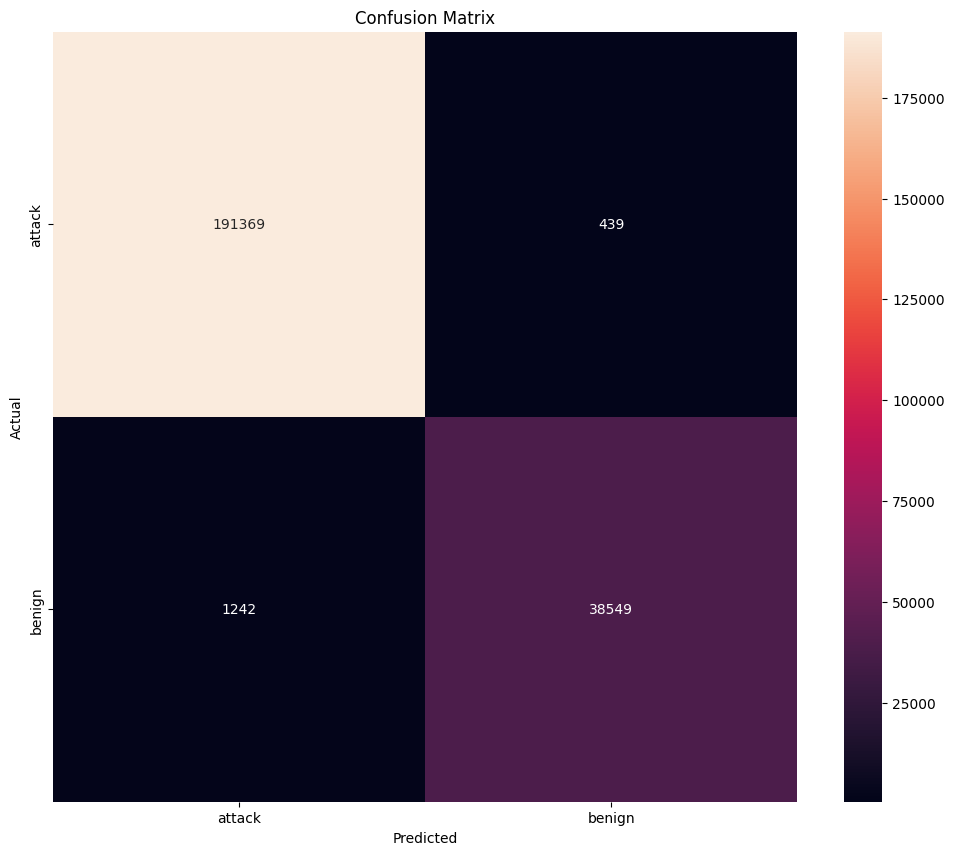

In [ ]:
# NF-ToN-IoT Real Data Only Training
cur_dataset = datasets[0]
cur_model = model_choices[0]

run_ids_training_bin(
    x_real=f"../data/processed/{cur_dataset}/X_train.csv",
    y_real=f"../data/processed/{cur_dataset}/y_train.csv",
    synthetic_path=None,
    x_test=f"../data/processed/{cur_dataset}/X_test.csv",
    y_test=f"../data/processed/{cur_dataset}/y_test.csv",
    model_out=f"../experiments/ids_models/real_{cur_dataset}_bin_gan.pkl",
    results_dir=f"../experiments/results/{cur_dataset}/results/real/binary/",
    model=cur_model
)

Classes: ['injection' 'ddos' 'scanning' 'benign' 'xss' 'dos' 'password' 'backdoor'
 'mitm' 'ransomware'], Test Classes: ['injection' 'ddos' 'benign' 'password' 'dos' 'xss' 'backdoor' 'scanning'
 'mitm' 'ransomware']
number of classes: 10, Classes: [0 1 2 3 4 5 6 7 8 9]
Loss function: Cross Entropy Loss
Epoch 1/50, Loss: 0.9195
Epoch 5/50, Loss: 0.8446
Epoch 10/50, Loss: 0.8122
Epoch 15/50, Loss: 0.7978
Epoch 20/50, Loss: 0.7881
Epoch 25/50, Loss: 0.7823
Epoch 30/50, Loss: 0.7797
Epoch 35/50, Loss: 0.7759
Epoch 40/50, Loss: 0.7744
Epoch 45/50, Loss: 0.7721
Epoch 50/50, Loss: 0.7720

Test Accuracy: 68.04%

Classification Report:
              precision    recall  f1-score   support

    backdoor       1.00      0.98      0.99      3418
      benign       0.98      0.98      0.98     39791
        ddos       0.68      0.69      0.68     39421
         dos       0.00      0.00      0.00      3489
   injection       0.60      0.95      0.73     91785
        mitm       0.49      0.14      0

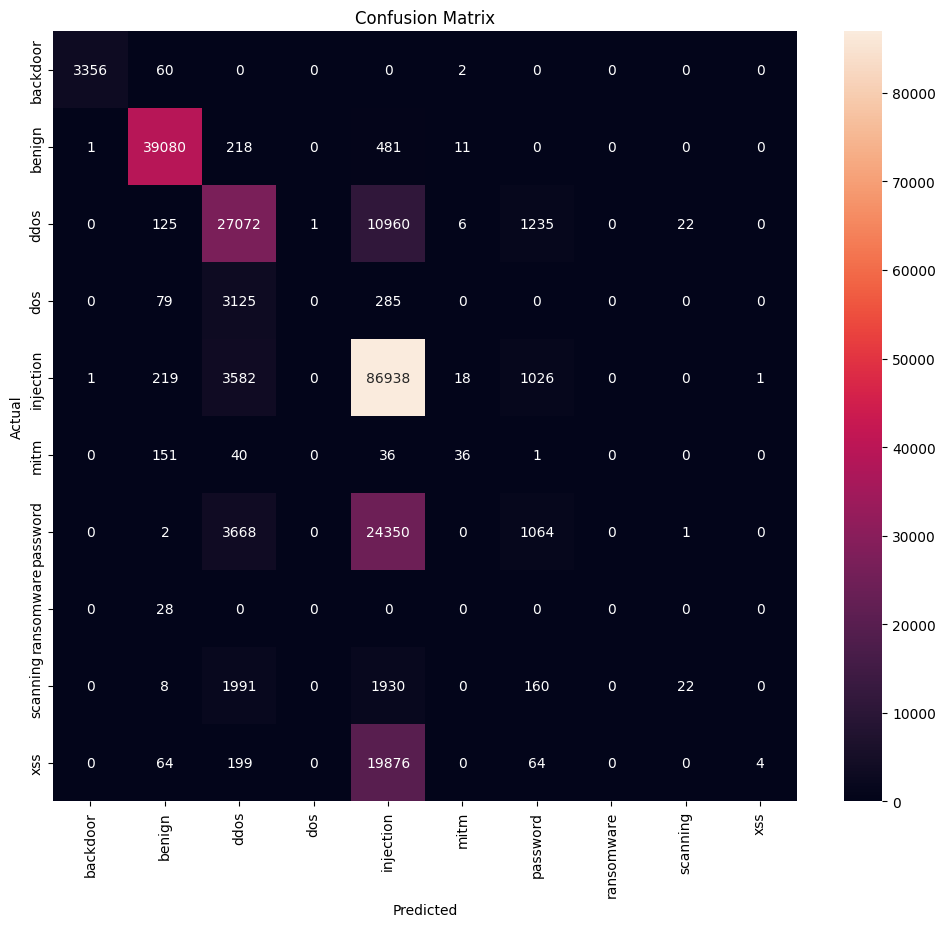

In [ ]:
# NF-ToN-IoT Real Data Only Training
cur_dataset = datasets[0]
cur_model = model_choices[1]

run_ids_training(
    x_real=f"../data/processed/{cur_dataset}/X_train.csv",
    y_real=f"../data/processed/{cur_dataset}/y_train.csv",
    synthetic_path=None,
    x_test=f"../data/processed/{cur_dataset}/X_test.csv",
    y_test=f"../data/processed/{cur_dataset}/y_test.csv",
    model_out=f"../experiments/ids_models/real_{cur_dataset}_gan.pkl",
    results_dir=f"../experiments/results/{cur_dataset}/results/real/multi_class/",
    model=cur_model
)

Classes: ['attack' 'benign'], Test Classes: ['attack' 'benign']
number of classes: 2, Classes: [0 1]
Loss function: Binary Cross Entropy with Logits
Epoch 1/50, Loss: 0.0570
Epoch 5/50, Loss: 0.0415
Epoch 10/50, Loss: 0.0325
Epoch 15/50, Loss: 0.0310
Epoch 20/50, Loss: 0.0284
Epoch 25/50, Loss: 0.0271
Epoch 30/50, Loss: 0.0262
Epoch 35/50, Loss: 0.0257
Epoch 40/50, Loss: 0.0256
Epoch 45/50, Loss: 0.0247
Epoch 50/50, Loss: 0.0253

Test Accuracy: 99.29%

Classification Report:
              precision    recall  f1-score   support

      attack       0.99      1.00      1.00    191808
      benign       0.99      0.97      0.98     39791

    accuracy                           0.99    231599
   macro avg       0.99      0.98      0.99    231599
weighted avg       0.99      0.99      0.99    231599



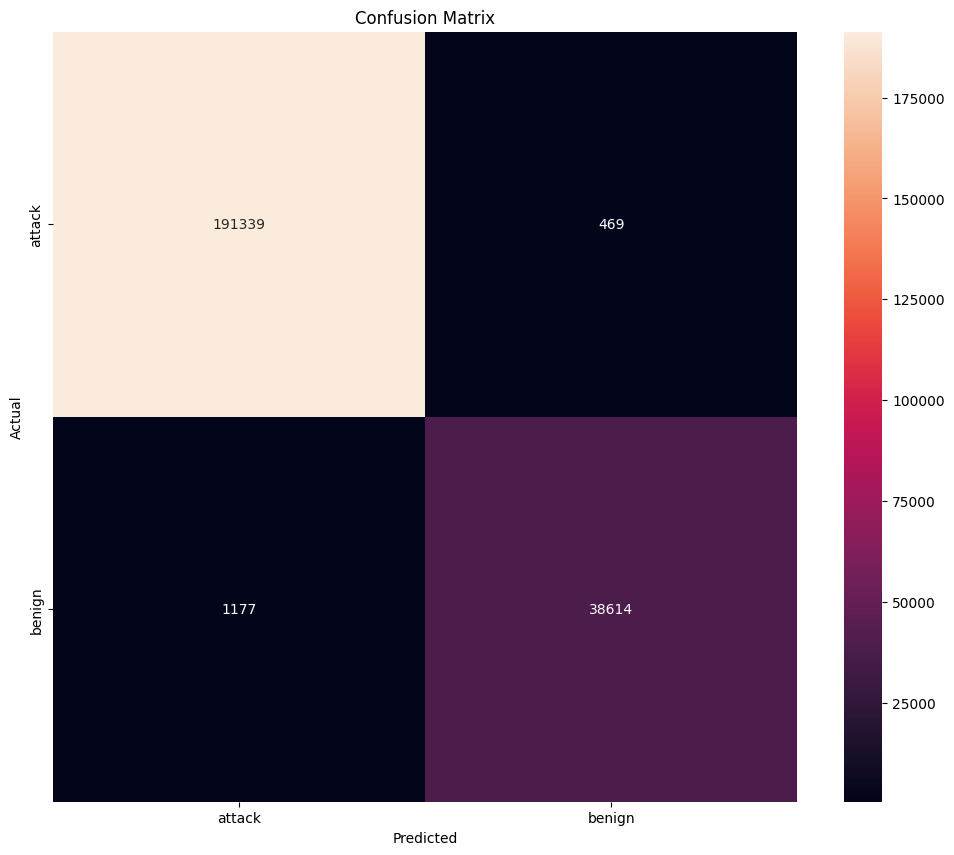

In [ ]:
# NF-ToN-IoT Real and Syntthetic Data Training
cur_dataset = datasets[0]
cur_model = model_choices[0]

run_ids_training_bin(
    x_real=f"../data/processed/{cur_dataset}/X_train.csv",
    y_real=f"../data/processed/{cur_dataset}/y_train.csv",
    synthetic_path=f"../data/synthetic/{cur_dataset}/synthetic_data.csv",
    x_test=f"../data/processed/{cur_dataset}/X_test.csv",
    y_test=f"../data/processed/{cur_dataset}/y_test.csv",
    model_out=f"../experiments/ids_models/real_synthetic_{cur_dataset}_bin_gan.pkl",
    results_dir=f"../experiments/results/{cur_dataset}/results/real_synthetic/binary/",
    model=cur_model
)


Classes: ['injection' 'ddos' 'scanning' 'benign' 'xss' 'dos' 'password' 'backdoor'
 'mitm' 'ransomware'], Test Classes: ['injection' 'ddos' 'benign' 'password' 'dos' 'xss' 'backdoor' 'scanning'
 'mitm' 'ransomware']
number of classes: 10, Classes: [0 1 2 3 4 5 6 7 8 9]
Loss function: Cross Entropy Loss
Epoch 1/50, Loss: 0.9327
Epoch 5/50, Loss: 0.8287
Epoch 10/50, Loss: 0.7916
Epoch 15/50, Loss: 0.7748
Epoch 20/50, Loss: 0.7663
Epoch 25/50, Loss: 0.7595
Epoch 30/50, Loss: 0.7547
Epoch 35/50, Loss: 0.7510
Epoch 40/50, Loss: 0.7483
Epoch 45/50, Loss: 0.7446
Epoch 50/50, Loss: 0.7435

Test Accuracy: 67.31%

Classification Report:
              precision    recall  f1-score   support

    backdoor       1.00      0.99      0.99      3418
      benign       0.98      0.98      0.98     39791
        ddos       0.64      0.68      0.66     39421
         dos       0.29      0.25      0.27      3489
   injection       0.60      0.93      0.73     91785
        mitm       0.25      0.19      0

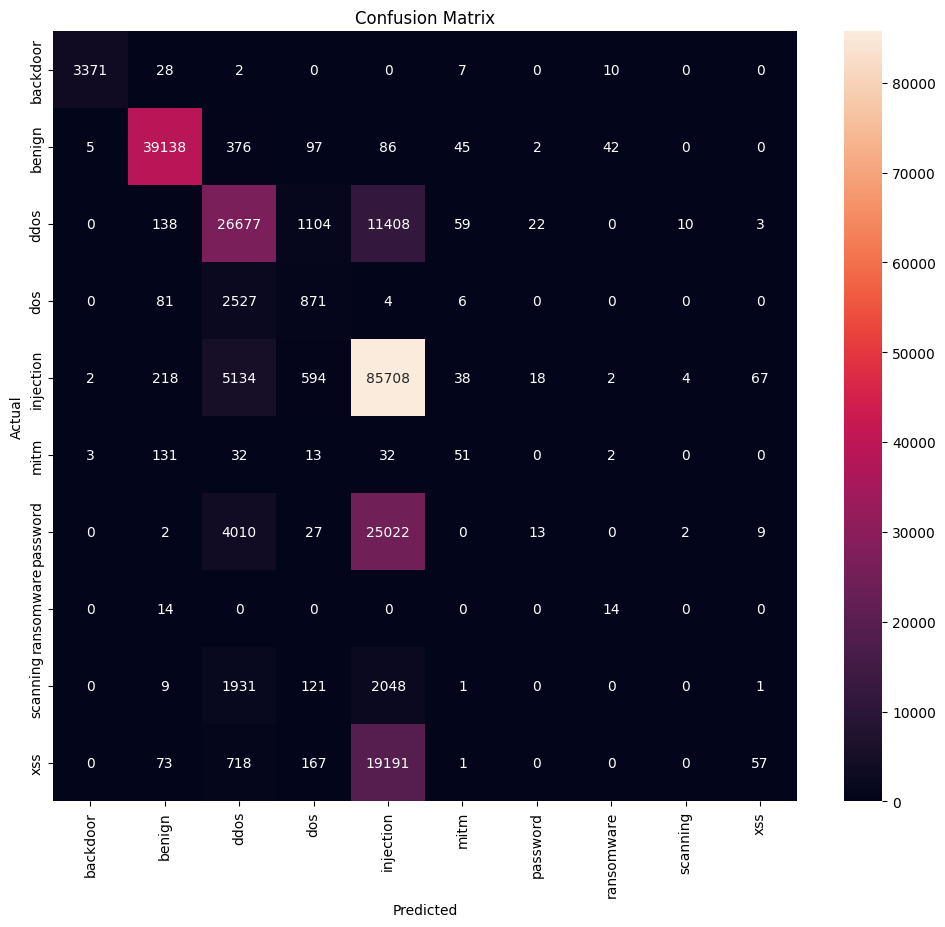

In [ ]:
# NF-ToN-IoT Real and Syntthetic Data Training
cur_dataset = datasets[0]
cur_model = model_choices[1]

run_ids_training(
    x_real=f"../data/processed/{cur_dataset}/X_train.csv",
    y_real=f"../data/processed/{cur_dataset}/y_train.csv",
    synthetic_path=f"../data/synthetic/{cur_dataset}/synthetic_data.csv",
    x_test=f"../data/processed/{cur_dataset}/X_test.csv",
    y_test=f"../data/processed/{cur_dataset}/y_test.csv",
    model_out=f"../experiments/ids_models/real_synthetic_{cur_dataset}_gan.pkl",
    results_dir=f"../experiments/results/{cur_dataset}/results/real_synthetic/multi_class/",
    model=cur_model
)


# UNSW-NB15

In [12]:
synthetic_data_UNSW = make_synthetic_data(
    X_train_UNSW,
    y_train_UNSW,
    X_test_UNSW,
    y_test_UNSW,
    target_variable,
    dataset=datasets[1],
    gan_augmentor=augmentor_ctgan)

Generating synthetic data for category: Fuzzers
Generating synthetic data for category: DoS
Generating synthetic data for category: Reconnaissance
Generating synthetic data for category: Analysis
Generating synthetic data for category: Backdoor
Generating synthetic data for category: Shellcode
Generating synthetic data for category: Worms
Size of synthetic data: (94052, 41)


In [13]:
# # UNSW-NB15 Synthetic Data Only Training
# cur_dataset = datasets[1]
# cur_model = model_choices[1]

# run_ids_training(
#     # x_real=f"../data/processed/{cur_dataset}/X_train.csv",
#     # y_real=f"../data/processed/{cur_dataset}/y_train.csv",
#     x_real=None,
#     y_real=None,
#     synthetic_path=f"../data/synthetic/{cur_dataset}/synthetic_data.csv",
#     x_test=f"../data/processed/{cur_dataset}/X_test.csv",
#     y_test=f"../data/processed/{cur_dataset}/y_test.csv",
#     model_out=f"../experiments/ids_models/random_forest_{cur_dataset}.pkl",
#     results_dir=f"../experiments/results/{cur_dataset}/results/simple/",
#     model=cur_model
# )


Classes: ['benign' 'attack'], Test Classes: ['benign' 'attack']
number of classes: 2, Classes: [0 1]
Loss function: Binary Cross Entropy with Logits
Epoch 1/50, Loss: 0.1740
Epoch 5/50, Loss: 0.1209
Epoch 10/50, Loss: 0.1142
Epoch 15/50, Loss: 0.1105
Epoch 20/50, Loss: 0.1080
Epoch 25/50, Loss: 0.1064
Epoch 30/50, Loss: 0.1050
Epoch 35/50, Loss: 0.1040
Epoch 40/50, Loss: 0.1033
Epoch 45/50, Loss: 0.1022
Epoch 50/50, Loss: 0.1017

Test Accuracy: 86.20%

Classification Report:
              precision    recall  f1-score   support

      attack       0.82      0.96      0.88     45332
      benign       0.94      0.74      0.83     36978

    accuracy                           0.86     82310
   macro avg       0.88      0.85      0.86     82310
weighted avg       0.87      0.86      0.86     82310



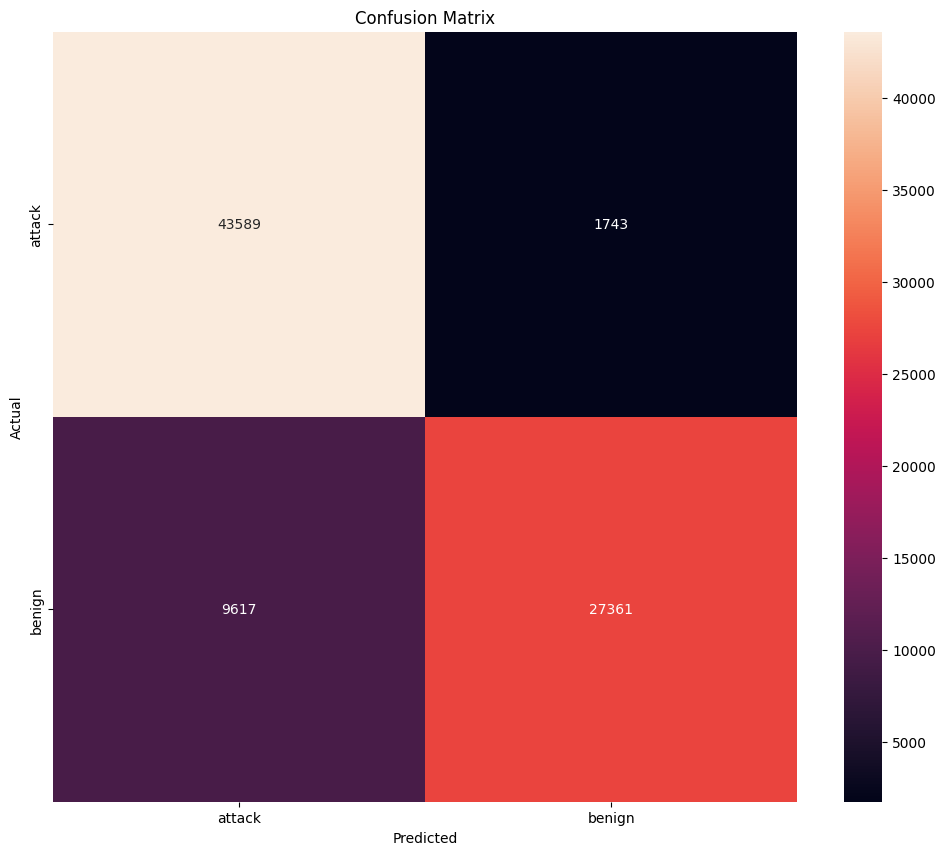

In [ ]:
# UNSW-NB15 Real Data Only Training
cur_dataset = datasets[1]
cur_model = model_choices[0]

run_ids_training_bin(
    x_real=f"../data/processed/{cur_dataset}/X_train.csv",
    y_real=f"../data/processed/{cur_dataset}/y_train.csv",
    synthetic_path=None,
    x_test=f"../data/processed/{cur_dataset}/X_test.csv",
    y_test=f"../data/processed/{cur_dataset}/y_test.csv",
    model_out=f"../experiments/ids_models/real_{cur_dataset}_bin_gan.pkl",
    results_dir=f"../experiments/results/{cur_dataset}/results/real/binary/",
    model=cur_model
)

Classes: ['normal' 'backdoor' 'analysis' 'fuzzers' 'shellcode' 'reconnaissance'
 'exploits' 'dos' 'worms' 'generic'], Test Classes: ['normal' 'reconnaissance' 'backdoor' 'dos' 'exploits' 'analysis'
 'fuzzers' 'worms' 'shellcode' 'generic']
number of classes: 10, Classes: [0 1 2 3 4 5 6 7 8 9]
Loss function: Cross Entropy Loss
Epoch 1/50, Loss: 0.7022
Epoch 5/50, Loss: 0.5143
Epoch 10/50, Loss: 0.4861
Epoch 15/50, Loss: 0.4718
Epoch 20/50, Loss: 0.4630
Epoch 25/50, Loss: 0.4566
Epoch 30/50, Loss: 0.4511
Epoch 35/50, Loss: 0.4470
Epoch 40/50, Loss: 0.4429
Epoch 45/50, Loss: 0.4394
Epoch 50/50, Loss: 0.4377

Test Accuracy: 74.49%

Classification Report:
                precision    recall  f1-score   support

      analysis       0.01      0.01      0.01       677
      backdoor       0.03      0.04      0.03       583
           dos       0.37      0.04      0.08      4089
      exploits       0.57      0.87      0.69     11132
       fuzzers       0.27      0.56      0.37      6062
    

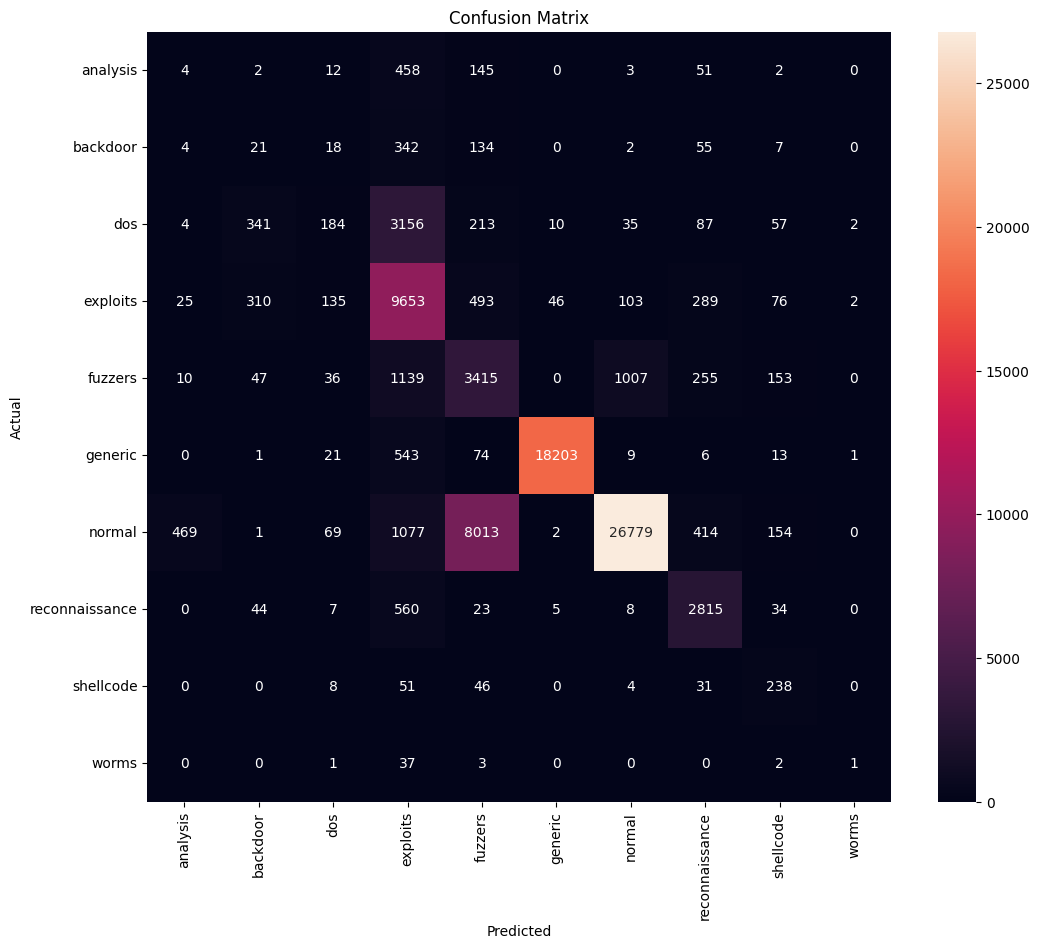

In [ ]:
# UNSW-NB15 Real Data Only Training
cur_dataset = datasets[1]
cur_model = model_choices[1]

run_ids_training(
    x_real=f"../data/processed/{cur_dataset}/X_train.csv",
    y_real=f"../data/processed/{cur_dataset}/y_train.csv",
    synthetic_path=None,
    x_test=f"../data/processed/{cur_dataset}/X_test.csv",
    y_test=f"../data/processed/{cur_dataset}/y_test.csv",
    model_out=f"../experiments/ids_models/real_{cur_dataset}_gan.pkl",
    results_dir=f"../experiments/results/{cur_dataset}/results/real/multi_class/",
    model=cur_model
)

Classes: ['benign' 'attack'], Test Classes: ['benign' 'attack']
number of classes: 2, Classes: [0 1]
Loss function: Binary Cross Entropy with Logits
Epoch 1/50, Loss: 0.1242
Epoch 5/50, Loss: 0.0814
Epoch 10/50, Loss: 0.0759
Epoch 15/50, Loss: 0.0734
Epoch 20/50, Loss: 0.0716
Epoch 25/50, Loss: 0.0705
Epoch 30/50, Loss: 0.0698
Epoch 35/50, Loss: 0.0689
Epoch 40/50, Loss: 0.0682
Epoch 45/50, Loss: 0.0678
Epoch 50/50, Loss: 0.0673

Test Accuracy: 86.10%

Classification Report:
              precision    recall  f1-score   support

      attack       0.81      0.97      0.88     45332
      benign       0.95      0.73      0.82     36978

    accuracy                           0.86     82310
   macro avg       0.88      0.85      0.85     82310
weighted avg       0.87      0.86      0.86     82310



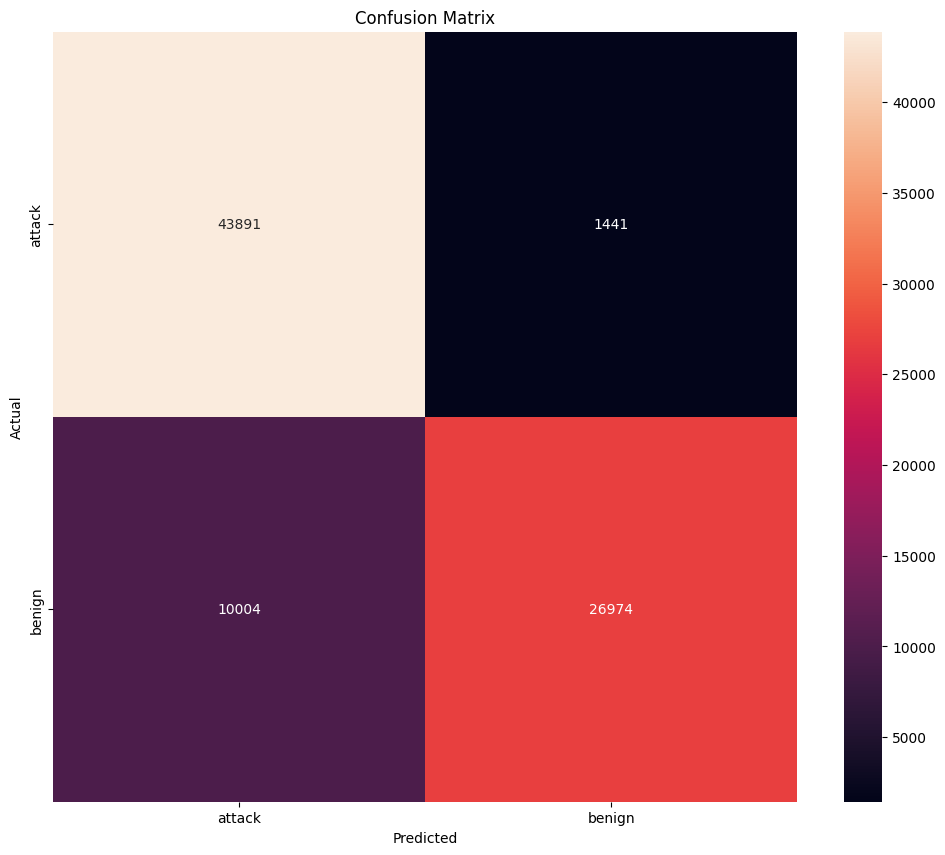

In [ ]:
# UNSW-NB15 Real and Syntthetic Data Training
cur_dataset = datasets[1]
cur_model = model_choices[0]

run_ids_training_bin(
    x_real=f"../data/processed/{cur_dataset}/X_train.csv",
    y_real=f"../data/processed/{cur_dataset}/y_train.csv",
    synthetic_path=f"../data/synthetic/{cur_dataset}/synthetic_data.csv",
    x_test=f"../data/processed/{cur_dataset}/X_test.csv",
    y_test=f"../data/processed/{cur_dataset}/y_test.csv",
    model_out=f"../experiments/ids_models/real_synthetic_{cur_dataset}_bin_gan.pkl",
    results_dir=f"../experiments/results/{cur_dataset}/results/real_synthetic/bin/",
    model=cur_model
)


Classes: ['normal' 'backdoor' 'analysis' 'fuzzers' 'shellcode' 'reconnaissance'
 'exploits' 'dos' 'worms' 'generic'], Test Classes: ['normal' 'reconnaissance' 'backdoor' 'dos' 'exploits' 'analysis'
 'fuzzers' 'worms' 'shellcode' 'generic']
number of classes: 10, Classes: [0 1 2 3 4 5 6 7 8 9]
Loss function: Cross Entropy Loss
Epoch 1/50, Loss: 0.7775
Epoch 5/50, Loss: 0.4591
Epoch 10/50, Loss: 0.4065
Epoch 15/50, Loss: 0.3819
Epoch 20/50, Loss: 0.3681
Epoch 25/50, Loss: 0.3572
Epoch 30/50, Loss: 0.3489
Epoch 35/50, Loss: 0.3423
Epoch 40/50, Loss: 0.3366
Epoch 45/50, Loss: 0.3320
Epoch 50/50, Loss: 0.3283

Test Accuracy: 75.32%

Classification Report:
                precision    recall  f1-score   support

      analysis       0.06      0.10      0.08       677
      backdoor       0.04      0.07      0.05       583
           dos       0.22      0.14      0.17      4089
      exploits       0.59      0.80      0.68     11132
       fuzzers       0.30      0.33      0.31      6062
    

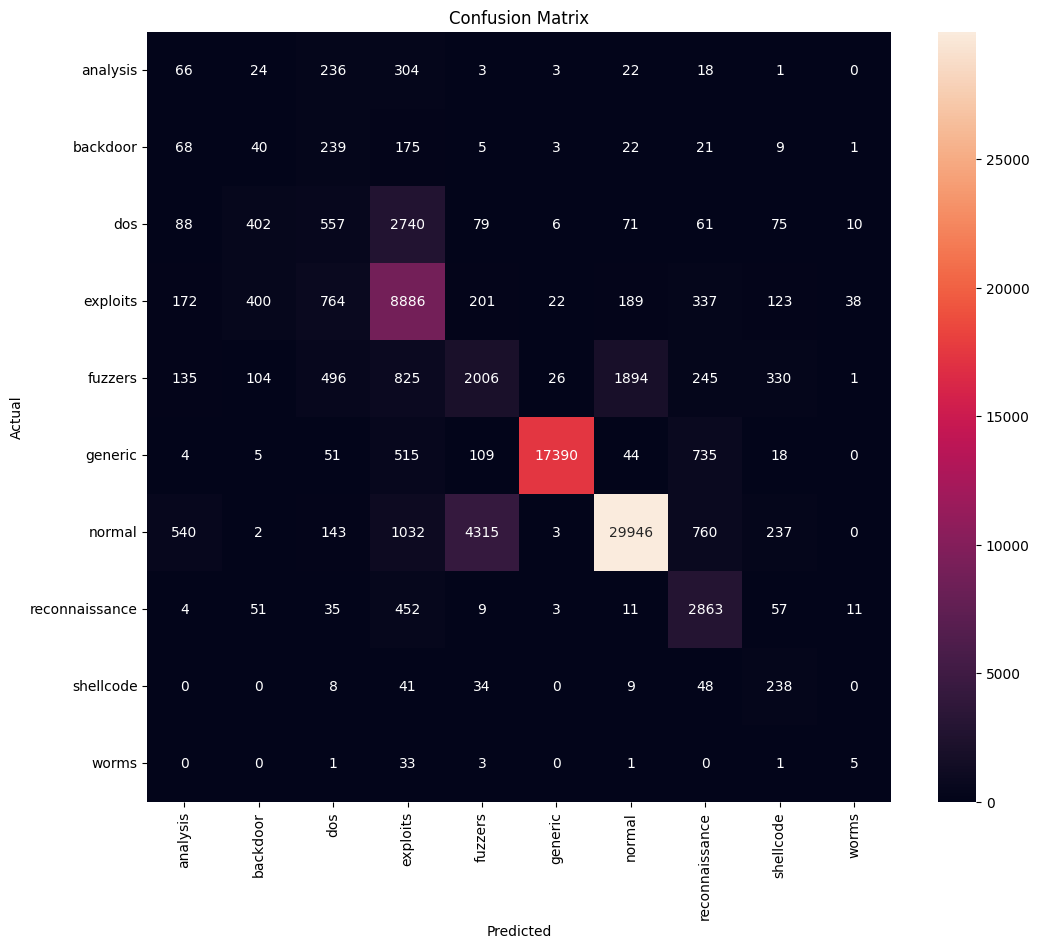

In [ ]:
# UNSW-NB15 Real and Syntthetic Data Training
cur_dataset = datasets[1]
cur_model = model_choices[1]

run_ids_training(
    x_real=f"../data/processed/{cur_dataset}/X_train.csv",
    y_real=f"../data/processed/{cur_dataset}/y_train.csv",
    synthetic_path=f"../data/synthetic/{cur_dataset}/synthetic_data.csv",
    x_test=f"../data/processed/{cur_dataset}/X_test.csv",
    y_test=f"../data/processed/{cur_dataset}/y_test.csv",
    model_out=f"../experiments/ids_models/real_synthetic_{cur_dataset}_gan.pkl",
    results_dir=f"../experiments/results/{cur_dataset}/results/real_synthetic/multi_class/",
    model=cur_model
)


In [ ]:
# from src.ids.train_ids import random_search_training
# random_search_training(
#     x_real=f"../data/processed/{cur_dataset}/X_train.csv",
#     y_real=f"../data/processed/{cur_dataset}/y_train.csv",
#     synthetic_path=f"../data/synthetic/{cur_dataset}/synthetic_data.csv",
#     x_test=f"../data/processed/{cur_dataset}/X_test.csv",
#     y_test=f"../data/processed/{cur_dataset}/y_test.csv",
#     results_dir=f"../experiments/results/{cur_dataset}/results/deeper/",
#     n_trials=30
# )